In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
X, y = make_classification(
    n_samples=100, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, class_sep=2, random_state=42
)

In [5]:
# Train Linear SVM (hard margin with large C)
clf = SVC(kernel="linear", C=1e5)
clf.fit(X, y)


SVC(C=100000.0, kernel='linear')

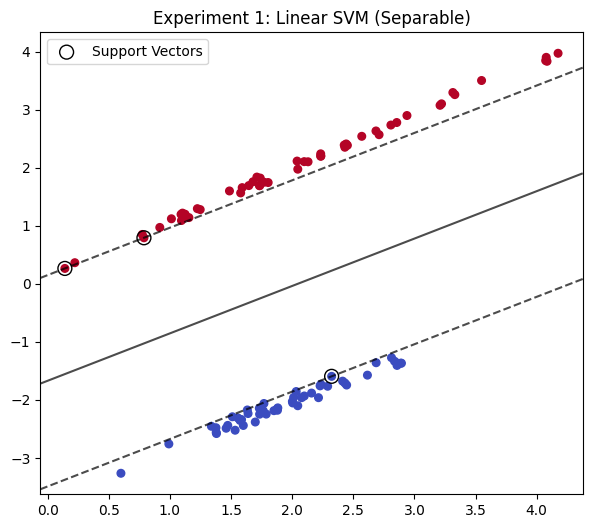

In [7]:
# Function to visualize
def plot_svm(clf, X, y, title):
    plt.figure(figsize=(7,6))
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, s=30)
    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
                s=100, facecolors='none', edgecolors='k', label="Support Vectors")

    ax = plt.gca()
    xlim, ylim = ax.get_xlim(), ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k',
               levels=[-1, 0, 1], alpha=0.7,
               linestyles=['--', '-', '--'])
    plt.title(title)
    plt.legend()
    plt.show()

plot_svm(clf, X, y, "Experiment 1: Linear SVM (Separable)")

In [9]:
X, y = make_classification(
    n_samples=100, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, class_sep=0.5, random_state=42
)


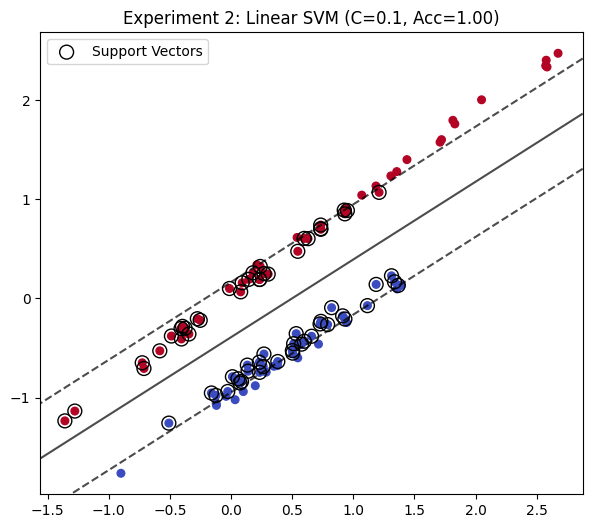

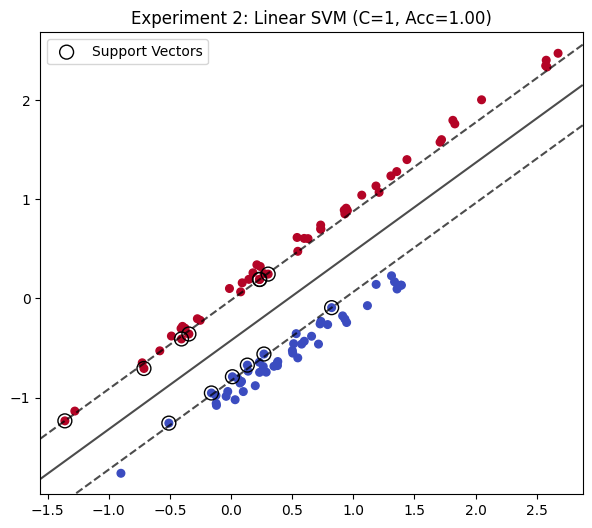

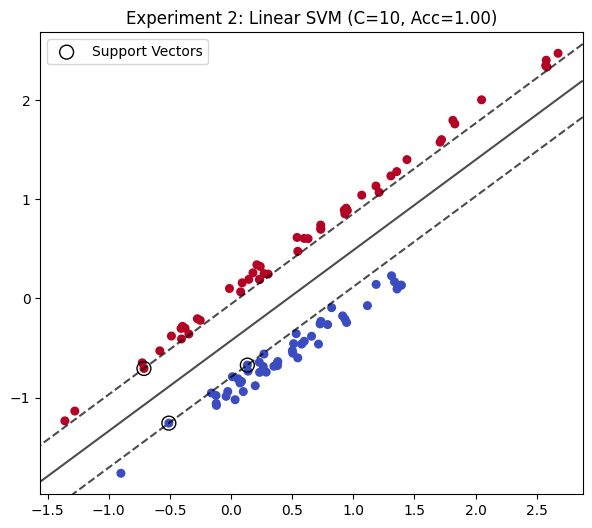

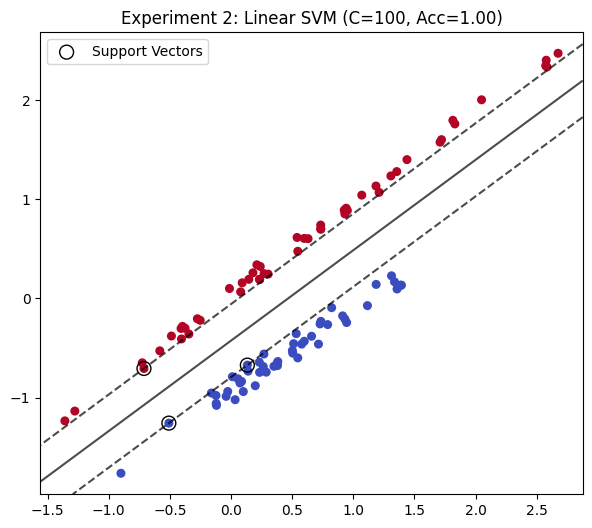

In [11]:
for C in [0.1, 1, 10, 100]:
    clf = SVC(kernel="linear", C=C)
    clf.fit(X, y)
    acc = accuracy_score(y, clf.predict(X))
    plot_svm(clf, X, y, f"Experiment 2: Linear SVM (C={C}, Acc={acc:.2f})")


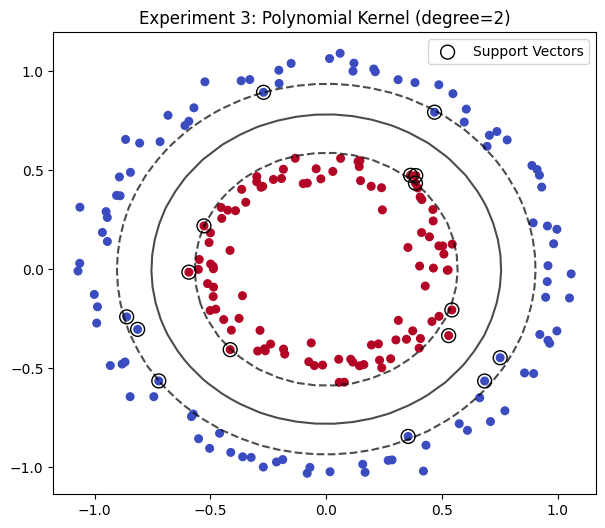

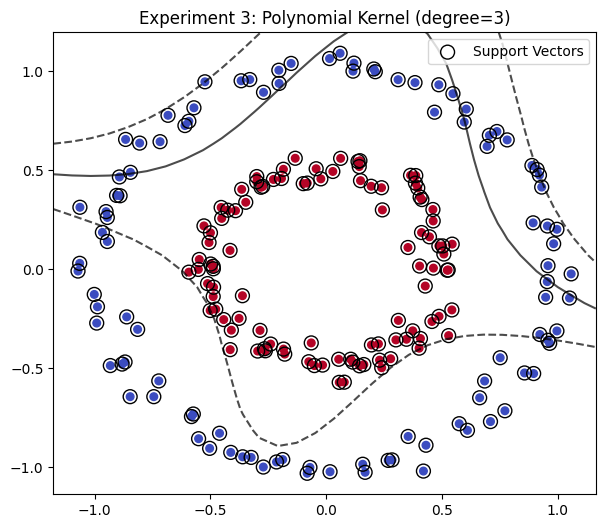

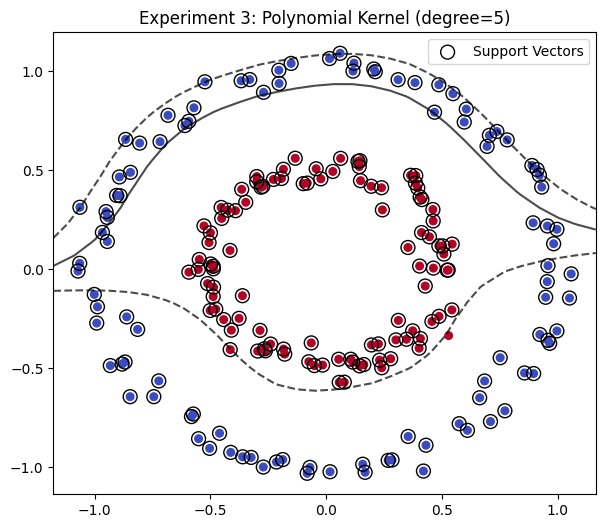

In [13]:
# Generate concentric circles dataset
X, y = make_circles(n_samples=200, factor=0.5, noise=0.05, random_state=42)

# Try polynomial kernels
for degree in [2, 3, 5]:
    clf = SVC(kernel="poly", degree=degree, C=1)
    clf.fit(X, y)
    plot_svm(clf, X, y, f"Experiment 3: Polynomial Kernel (degree={degree})")


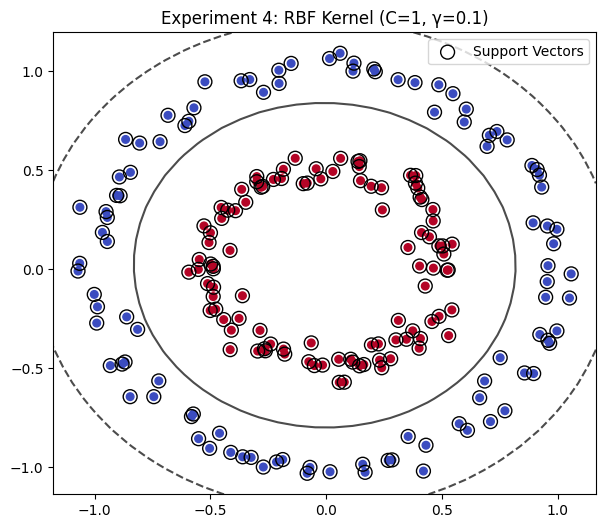

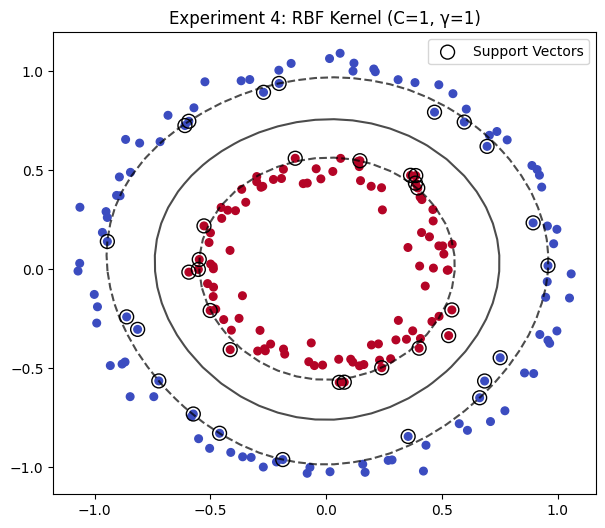

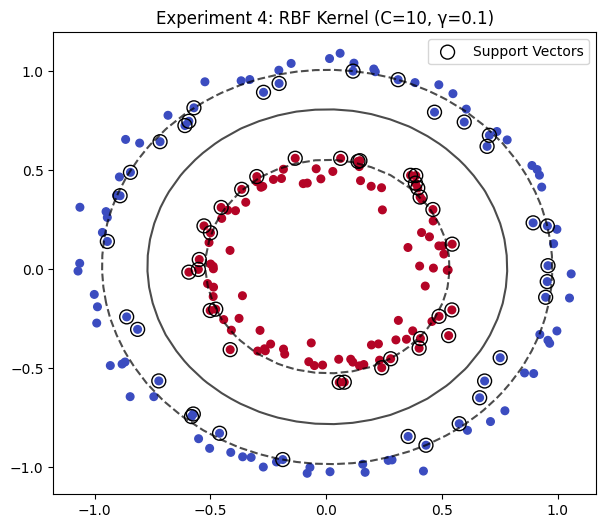

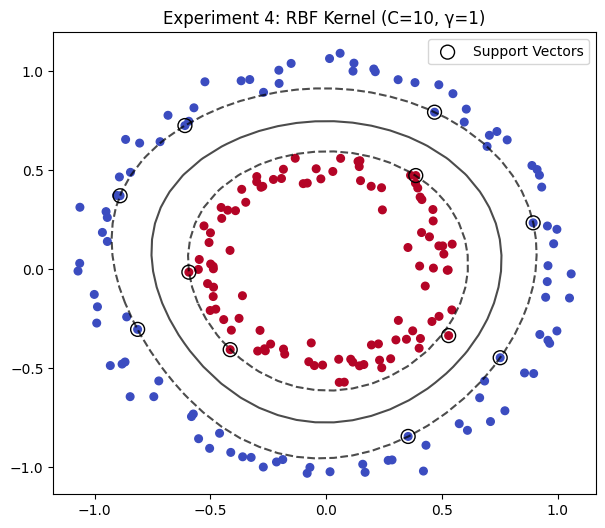

In [15]:
# Try RBF kernel with different (C, gamma)
for C in [1, 10]:
    for gamma in [0.1, 1]:
        clf = SVC(kernel="rbf", C=C, gamma=gamma)
        clf.fit(X, y)
        plot_svm(clf, X, y, f"Experiment 4: RBF Kernel (C={C}, γ={gamma})")


In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = SVC(kernel="rbf", C=10, gamma=0.5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Cross-validation
scores = cross_val_score(clf, X, y, cv=5)
print("Cross-validation Accuracy Scores:", scores)
print("Mean CV Accuracy:", scores.mean())


Accuracy: 1.0
Confusion Matrix:
 [[32  0]
 [ 0 28]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        28

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Cross-validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0
